<a href="https://colab.research.google.com/github/robinkm0610/ML_with_Python-R/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('Movie_regression.csv', header= 0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
%load_ext rpy2.ipython

In [6]:
%%R
movie <- read.csv('Movie_regression.csv')

In [7]:
%%R
head(movie)

  Marketing.expense Production.expense Multiplex.coverage   Budget Movie_length
1           20.1264              59.62              0.462 36524.12        138.7
2           20.5462              69.14              0.531 35668.65        152.4
3           20.5458              69.14              0.531 39912.68        134.6
4           20.6474              59.36              0.542 38873.89        119.3
5           21.3810              59.36              0.542 39701.58        127.7
6           20.5970              59.36              0.542 35718.65        132.2
  Lead_.Actor_Rating Lead_Actress_rating Director_rating Producer_rating
1              7.825               8.095           7.910           7.995
2              7.505               7.650           7.440           7.470
3              7.485               7.570           7.495           7.515
4              6.895               7.035           6.920           7.020
5              6.920               7.070           6.815           7.070
6 

In [8]:
%%R
#Data Preprosessing
summary(movie)

 Marketing.expense Production.expense Multiplex.coverage     Budget     
 Min.   :  20.13   Min.   : 55.92     Min.   :0.1290     Min.   :19781  
 1st Qu.:  21.64   1st Qu.: 65.38     1st Qu.:0.3760     1st Qu.:32694  
 Median :  25.13   Median : 74.38     Median :0.4620     Median :34488  
 Mean   :  92.27   Mean   : 77.27     Mean   :0.4453     Mean   :34911  
 3rd Qu.:  93.54   3rd Qu.: 91.20     3rd Qu.:0.5510     3rd Qu.:36794  
 Max.   :1799.52   Max.   :110.48     Max.   :0.6150     Max.   :48773  
                                                                        
  Movie_length   Lead_.Actor_Rating Lead_Actress_rating Director_rating
 Min.   : 76.4   Min.   :3.840      Min.   :4.035       Min.   :3.840  
 1st Qu.:118.5   1st Qu.:7.316      1st Qu.:7.504       1st Qu.:7.296  
 Median :151.0   Median :8.307      Median :8.495       Median :8.312  
 Mean   :142.1   Mean   :8.014      Mean   :8.186       Mean   :8.020  
 3rd Qu.:167.6   3rd Qu.:8.865      3rd Qu.:9.030       

In [9]:
%%R
movie$Time_taken[is.na(movie$Time_taken)] <- mean(movie$Time_taken, na.rm = TRUE)

In [10]:
#python
df['Time_taken'].mean()

157.3914979757085

In [11]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [13]:
#Dummy variable Creation
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [14]:
# 2 categorical varibles - Genre, 3D_available

df['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [15]:
df['3D_available'].unique()

array(['YES', 'NO'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns=['Genre', '3D_available'], drop_first=True)

In [17]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,False,False,True,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,True,False,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,True,False,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,False,True,False,True
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,True,False,False


In [18]:
X = df.loc[:, df.columns != 'Collection']
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,False,False,True,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,False,True,False,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,True,False,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,False,True,False,True
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,False,True,False,False


In [19]:
X.shape

(506, 19)

In [20]:
y = df['Collection']
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [21]:
y.shape

(506,)

In [22]:
# Test-Train split in python
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(404, 19)

In [25]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,False,False,True,False
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,False,False,False,False
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,True,False,False,True
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,False,False,True,True
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,False,False,False,True


In [26]:
X_test.shape

(102, 19)

In [27]:
%%R
install.packages('caTools')

(as ‘lib’ is unspecified)














	‘/tmp/Rtmp5eHQSi/downloaded_packages’



In [28]:
%%R
library(caTools)

In [29]:
%%R
set.seed(0)
split = sample.split(movie, SplitRatio = 0.8)
train = subset(movie, split == TRUE)
test = subset(movie, split == FALSE)

In [30]:
#Training Regression Tree
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [31]:
#Predict values using trained model
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [32]:
y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

In [33]:
%%R
install.packages('rpart')
install.packages('rpart.plot')


(as ‘lib’ is unspecified)







	‘/tmp/Rtmp5eHQSi/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp5eHQSi/downloaded_packages’



In [34]:
%%R
library(rpart)
library(rpart.plot)

In [35]:
%%R
#run regression tree
regtree <- rpart(formula = Collection ~ ., data=train,control= rpart.control(maxdepth = 3) )

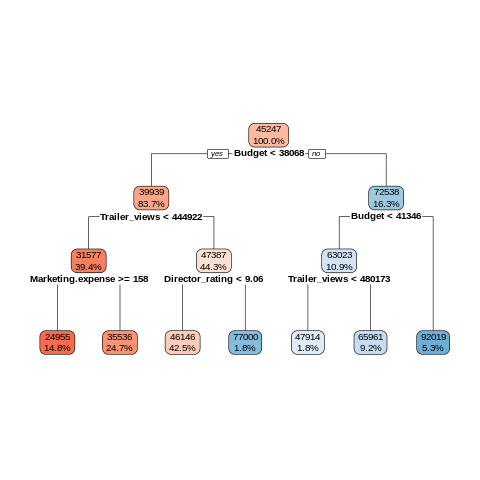

In [36]:
%%R
#plot the decisio tree
rpart.plot(regtree, box.palette="RdBu", digits = -3)

In [37]:
%%R
#predict value at any point
test$pred <- predict(regtree, test, type = 'vector')

In [38]:
%%R
MSE2 <- mean((test$pred - test$Collection) ^2)
MSE2

[1] 113058317


In [39]:
#Model Performance
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mean_squared_error(y_test, y_test_pred)

133822721.29403791

In [41]:
r2_score(y_test, y_test_pred)

0.5843041891011781

In [42]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [43]:
pip install Ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.5 MB/s eta 0:00:00


In [45]:
!pip install pydotplus graphviz
import pydotplus
from IPython.display import Image


In [46]:
#plotting a decision tree
dot_data = tree.export_graphviz(regtree, out_file=None)
from Ipython.display import Image
import graphviz

ModuleNotFoundError: No module named 'Ipython'

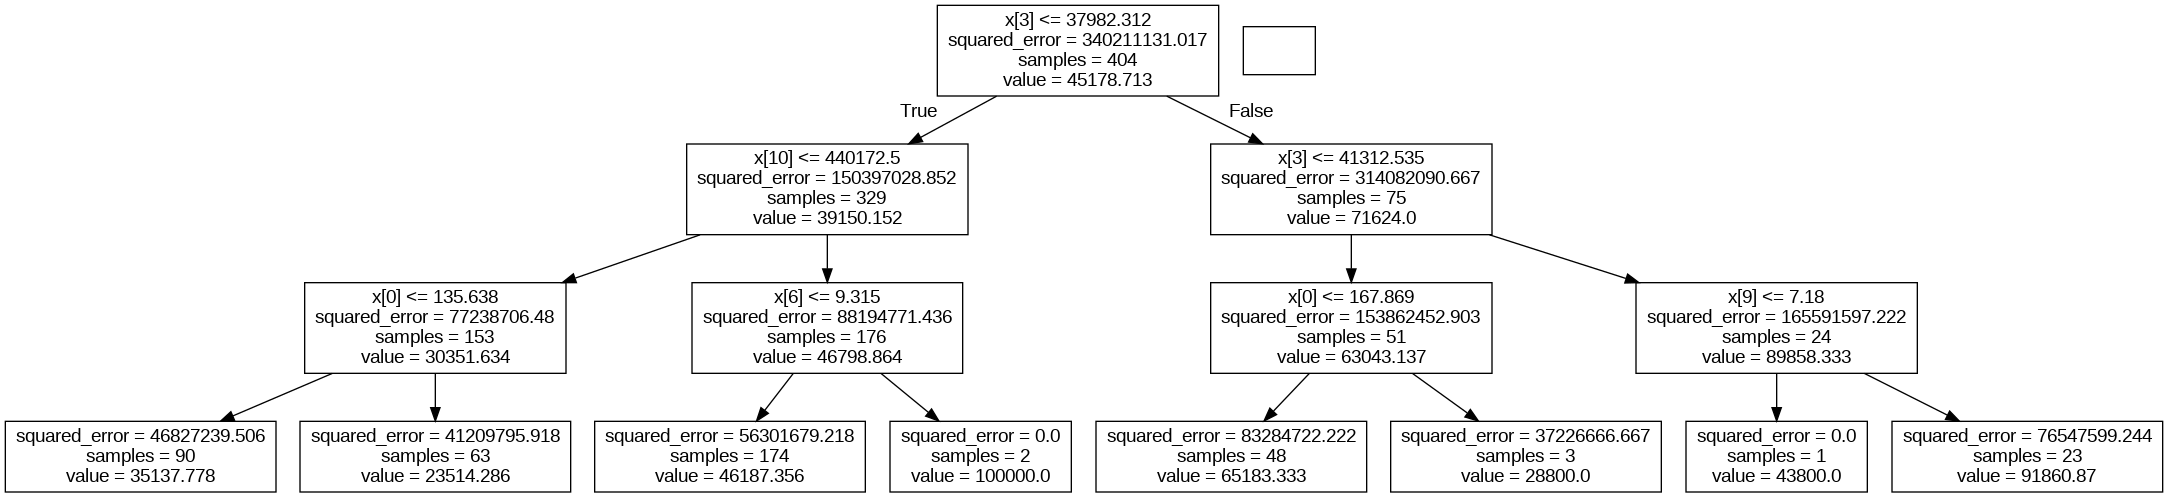

In [47]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('regtree.png')
Image(graph.create_png())

Controlling Tree growth

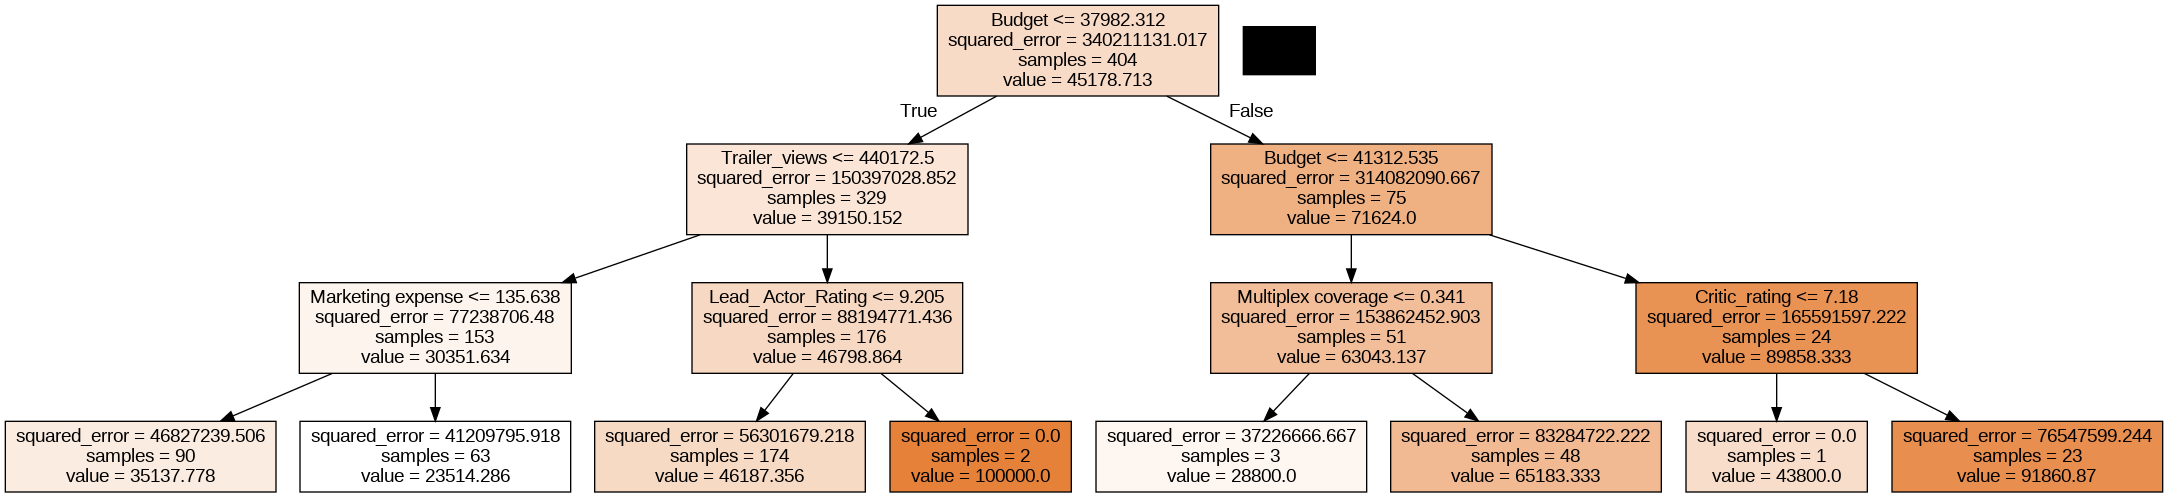

In [48]:
#maximum numbers of levels in tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [ ]:
#Minimum observations at leaf node
regtree = tree.DecisionTreeRegressor(min_samples_leaf=25, max_depth = 4)
regtree.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [ ]:
%%R
fulltree <- rpart(formula = Collection ~ ., data=train,control= rpart.control( maxdepth = 3) )
rpart.plot(fulltree, box.palette="RdBu", digits = -3)
printcp(fulltree)
plotcp(regtree)

In [ ]:
%%R
mincp <- regtree$cptable[which.min(regtree$cptable[,"xerror"]), "CP"]

In [ ]:
%%R
prunedtree <- prune(fulltree, cp = mincp)
rpart.plot(prunedtree, box.palette="RdBu", digits = -3)

In [ ]:
%%R
test$fulltree <- predict(fulltree, test, type = 'vector')
MSE2full <- mean((test$fulltree - test$Collection) ^2)


In [ ]:
%%R
test$prunedtree <- predict(prunedtree, test, type = 'vector')
MSE2pruned <- mean((test$prunedtree - test$Collection) ^2)

In [ ]:
%%R
accuracy_postprun <- mean(test$fulltree == test$Collection)
accuracy_postprun

In [ ]:
df = pd.read_csv('Movie_classification.csv', header= 0)

In [ ]:
df.info()

In [ ]:
#Missing value impution
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)
df.info()

In [ ]:
#dummy variable creation
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)

In [ ]:
df.head()

In [ ]:
#x y split
X = df.loc[:, df.columns != 'Start_Tech_Oscar']
X.head()

In [ ]:
y = df['Start_Tech_Oscar']
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [ ]:
#training classification tree
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train, y_train)

In [ ]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
accuracy_score(y_test, y_test_pred)

In [ ]:
#plotting decision tree

dot_data = tree.export_graphviz(clftree, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


In [ ]:
#controlling tree growth
clftree2 = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [ ]:
accuracy_score(y_test, clftree2.predict(X_test))

Bagging

In [ ]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()


In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000, bootstrap = True, n_jobs = -1, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, bag_clf.predict(X_test))

In [ ]:
accuracy_score(y_test, bag_clf.predict(X_test))

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
rf_clf = RandomForestClassifier(n_estimators=1000, max_features=2, random_state=42)

In [51]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, random_state=42)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [54]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4]])

In [55]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.0392156862745098

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42)

In [59]:
params_grid = {"max_features": [4,5,6,7,8,9,10], "min_samples_split": [2,3,10]}


In [62]:
grid_search = GridSearchCV(rf_clf, params_grid, cv=5, scoring="accuracy", n_jobs = -1)

In [63]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [65]:
grid_search.best_params_

{'max_features': 10, 'min_samples_split': 3}

{'max_features': 10, 'min_samples_split': 3}

In [66]:
cvrf_clf = grid_search.best_estimator_

In [67]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.06862745098039216

In [68]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 4]])

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc_clf = GradientBoostingClassifier()

In [71]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.029411764705882353

In [73]:
gbc_clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02,max_depth=1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [74]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.029411764705882353

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
ad_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [78]:
ad_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [79]:
accuracy_score(y_test, ad_clf.predict(X_test))

0.0196078431372549

In [80]:
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate=0.02, n_estimators=500)

In [81]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   learning_rate=0.02, n_estimators=500)

In [83]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.049019607843137254

In [84]:
import xgboost as xgb

In [89]:
xgb_clf = xgb.XGBClassifier(n_estimators=10000, learning_rate=0.3, max_depth=5, n_jobs= -1)

In [91]:
y_train.head()

220    53400
71     43400
240    54000
6      45800
417    20800
Name: Collection, dtype: int64

In [90]:
xgb_clf.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213], got [ 10000  12600  14000  14400  15000  16200  16400  16600  16800  17000
  17600  19000  19200  19400  20400  20800  21000  21600  21800  22000
  22600  23000  23400  23600  23800  24000  24200  24600  25000  25200
  25400  25600  26000  26200  26400  26600  26800  27000  27200  27600
  27800  28000  28200  28400  28600  28800  29000  29200  29600  29800
  30000  30200  30400  30600  30800  31200  31400  32000  32200  32400
  32600  32800  33000  33200  33400  33600  34200  34400  34600  34800
  35000  35200  35400  35600  35800  36000  36200  36400  36600  36800
  37000  37600  37800  38000  38200  38400  38600  38800  39000  39200
  39400  39600  39800  40000  40200  40400  40600  40800  41000  41200
  41400  41600  41800  42000  42200  42400  42800  43000  43200  43400
  43600  43800  44000  44200  44400  44600  44800  45000  45200  45400
  45600  45800  46000  46200  46400  46600  46800  47200  47400  47600
  47800  48000  48200  48400  48600  48800  49000  49200  49400  49600
  50000  50200  50400  50600  52400  52800  53000  53200  53400  54000
  54200  55000  55800  56000  56400  56800  57000  57200  57400  58000
  58200  59200  59600  59800  60200  60600  61000  61400  61600  62000
  62200  63000  63200  63400  64000  64400  64800  65000  65400  65800
  66000  66200  66400  66800  67600  69200  69400  69800  70200  70400
  70800  72000  72200  72400  72800  73000  74400  74600  75200  75800
  79600  82600  83400  84600  86200  87000  87600  88000  90800  92000
  93400  97000  97600 100000]